In [14]:
install.packages("pROC")
install.packages("vctrs")
install.packages("caret")
install.packages("nnet")
install.packages("ggplot2")
install.packages("cowplot")
install.packages("ggplot2")
install.packages("MASS")


The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages

The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages


Warning message:
"package 'MASS' is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages"


In [2]:
rm(list=ls()) #clears the workspace
all_table <- read.csv("/Users/User/Documents/GitHub/DesktopDownthrottlingExperiment/post_experiment/Regression/regression_tables/fieldwork/subjective_and_objective_table.csv")

# Visualise MOS distribution

In [15]:
install.packages("ordinal")

also installing the dependency 'ucminf'





The downloaded binary packages are in
	/var/folders/91/4c3th19d31j6hvx23r6bb5b00000gn/T//RtmpGmmtVP/downloaded_packages


In [32]:
library(ordinal)
all_table$ordered <- factor(all_table$serviceable_agg, 
levels =c(0,0.3333333333333333, 0.6666666666666666, 1.0), 
ordered = TRUE)

In [71]:
options(repr.plot.width = 10, repr.plot.height = 6)
#plot the target variable
par(bg = "white")  # set background color to white
hist(all_table$ordered,
     col = "black",
     border = "white")

ERROR: Error in hist.default(all_table$ordered, col = "black", border = "white"): 'x' must be numeric


In [35]:
sapply(all_table, function(x) if(is.numeric(x)) var(x, na.rm = TRUE) else NA)
na_columns <- colnames(all_table)[colSums(is.na(all_table)) > 0]
print(na_columns)

identifier          avg_up_ellen        avg_down_ellen 
                   NA          139.33063979          468.91113559 
        avg_rtt_ellen      avg_ellen_jitter          avg_pl_ellen 
          33.41962553          141.86326742           10.77782297 
         avg_up_aadya        avg_down_aadya         avg_rtt_aadya 
         152.36742688          364.18705751           29.20880345 
     avg_jitter_aadya          avg_pl_aadya           sd_up_ellen 
         150.69748123            0.73829219           37.13136321 
        sd_down_ellen          sd_rtt_ellen       sd_jitter_ellen 
          87.10220360           16.75217417          221.67016381 
          sd_pl_ellen           sd_up_aadya         sd_down_aadya 
           2.79126922           49.98557988          106.79891937 
         sd_rtt_aadya       sd_jitter_aadya           sd_pl_aadya 
           7.36652778          227.14097012            1.71707192 
      avg_down_google         avg_up_google        avg_rtt_google 
           2.47813063            0.62007658          300.53802778 
       sd_down_google          sd_up_google         sd_rtt_google 
           0.12913769            0.09177988           90.62328453 
             distance      telstra_distance         line_of_sight 
           0.17859159            0.34169745                    NA 
telstra_line_of_sight                 urban           e_audio_mos 
                   NA            0.15765766            0.74166372 
          e_video_mos                 e_mos           a_audio_mos 
           0.50612951            0.53100624            0.75876858 
          a_video_mos                 a_mos         agg_audio_mos 
           0.70712392            0.67351027            0.74223137 
        agg_video_mos               agg_mos           score_ellen 
           0.67082973            0.60763876            0.55137095 
          score_aadya             score_min     serviceable_ellen 
           0.82878629            0.54120954            0.18426760 
    serviceable_aadya       serviceable_agg               ordered 
           0.15586420            0.16107774                    NA

[1] "line_of_sight"         "telstra_line_of_sight" "ordered"              


In [51]:
library(ordinal)
all_table$rounded_serviceable_agg <- round(as.numeric(all_table$serviceable_agg), digits = 2)
all_table$ordered <- factor(all_table$rounded_serviceable_agg, 
levels =c(0.00,0.33, 0.5, 0.67, 1.00), 
ordered = TRUE)
fit <- clm(ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen
    + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya 
    + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen 
    + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya, data = all_table)
summary(fit)

formula: 
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya
data:    all_table

 link  threshold nobs logLik AIC    niter max.grad cond.H 
 logit flexible  37   -31.20 110.41 10(2) 3.13e-09 8.2e+06

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)  
avg_up_ellen     -0.16947    0.11935  -1.420   0.1556  
avg_down_ellen    0.06252    0.05823   1.074   0.2829  
avg_rtt_ellen    -0.20172    0.16688  -1.209   0.2267  
avg_ellen_jitter -0.13739    0.19852  -0.692   0.4889  
avg_pl_ellen      0.01536    0.20605   0.075   0.9406  
avg_up_aadya      0.12575    0.09925   1.267   0.2052  
avg_down_aadya   -0.08124    0.06953  -1.168   0.2426  
avg_rtt_aadya     0.05451    0.20134   0.271   0.7866  
avg_jit

### perform and plot the predictions

In [58]:
nrow(all_table)
levels(all_table$ordered)
table(all_table$ordered)

[1] 37

[1] "0"    "0.33" "0.5"  "0.67" "1"


   0 0.33  0.5 0.67    1 
  20    5    1    4    7 

In [60]:
preds <- predict(fit, all_table)
print(preds)
length(preds$fit)

$fit
 [1] 0.956661070 0.784647811 0.653116097 1.000000000 0.916926493 0.641125825
 [7] 0.572439960 0.295430706 0.050419573 0.748298072 1.000000000 0.636012668
[13] 0.394378123 0.383407811 0.975838908 0.951399104 0.218891005 0.332850082
[19] 0.275402425 0.520319436 0.158394682 0.218187868 0.243774445 0.926459562
[25] 0.037760217 0.007950778 0.978191987 0.984462939 0.914064594 0.230006156
[31] 0.990308481 0.999925232 0.205328927 0.911547641 0.677195331 0.540953847
[37] 0.508869145



[1] 37

Warning message in Ops.ordered(predict(fit, all_table), all_table$ordered):
"'-' is not meaningful for ordered factors"


[1] NA

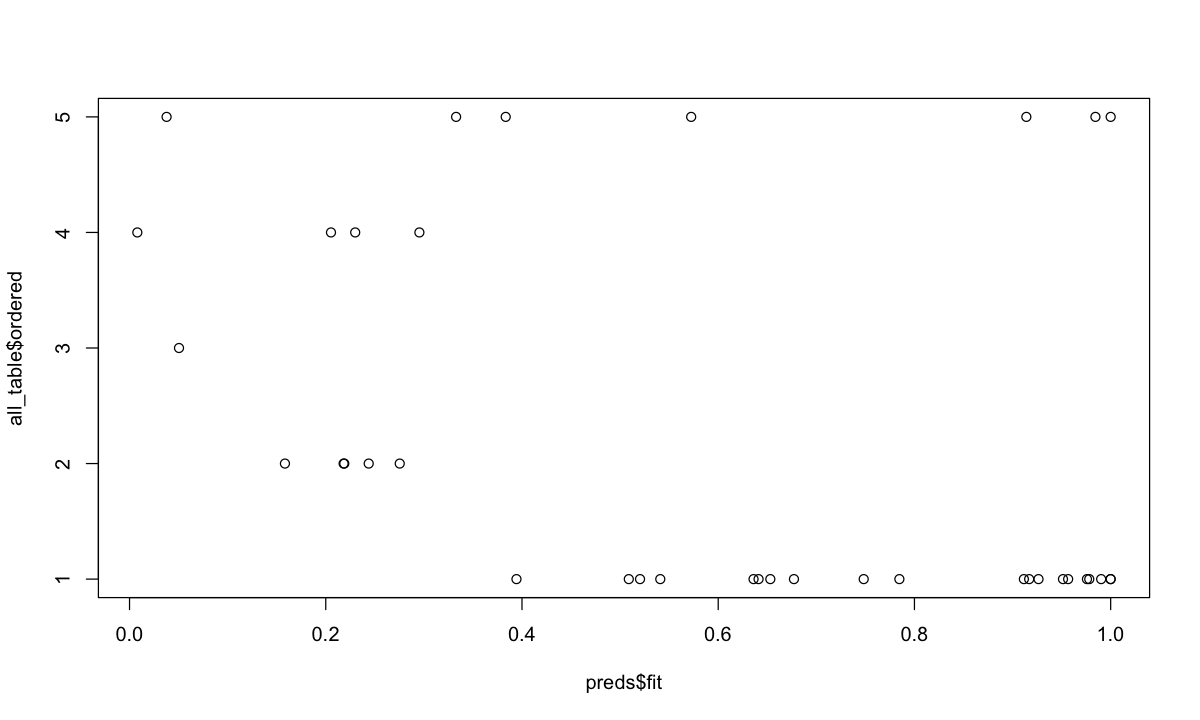

In [61]:
par(bg = "white")
preds <- predict(fit, all_table)
plot(preds$fit, all_table$ordered)

# Penalised regression 
### AIC

Start:  AIC=110.41
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya

                   Df    AIC
- avg_pl_ellen      1 108.41
- avg_rtt_aadya     1 108.48
- sd_jitter_aadya   1 108.53
- sd_pl_ellen       1 108.56
- avg_jitter_aadya  1 108.64
- sd_rtt_aadya      1 108.70
- avg_ellen_jitter  1 108.90
- sd_jitter_ellen   1 108.97
- avg_pl_aadya      1 109.28
- sd_rtt_ellen      1 109.46
- avg_down_ellen    1 109.61
- avg_down_aadya    1 109.93
- avg_rtt_ellen     1 109.94
- sd_down_aadya     1 110.05
- sd_pl_aadya       1 110.07
- sd_up_ellen       1 110.11
<none>                110.41
- avg_up_aadya      1 110.48
- sd_down_ellen     1 110.76
- avg_up_ellen      1 111.18
- sd_up_aadya       1 112

formula: ordered ~ avg_down_ellen + avg_rtt_ellen + avg_up_aadya
data:    all_table

 link  threshold nobs logLik AIC   niter max.grad cond.H 
 logit flexible  37   -35.91 85.82 7(2)  1.42e-12 5.4e+05

Coefficients:
               Estimate Std. Error z value Pr(>|z|)   
avg_down_ellen  0.02965    0.01936   1.531  0.12577   
avg_rtt_ellen  -0.11109    0.07299  -1.522  0.12801   
avg_up_aadya    0.11053    0.03802   2.907  0.00365 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold coefficients:
         Estimate Std. Error z value
0|0.33    -0.4758     2.2469  -0.212
0.33|0.5   0.4156     2.2296   0.186
0.5|0.67   0.6101     2.2244   0.274
0.67|1     1.5568     2.2536   0.691

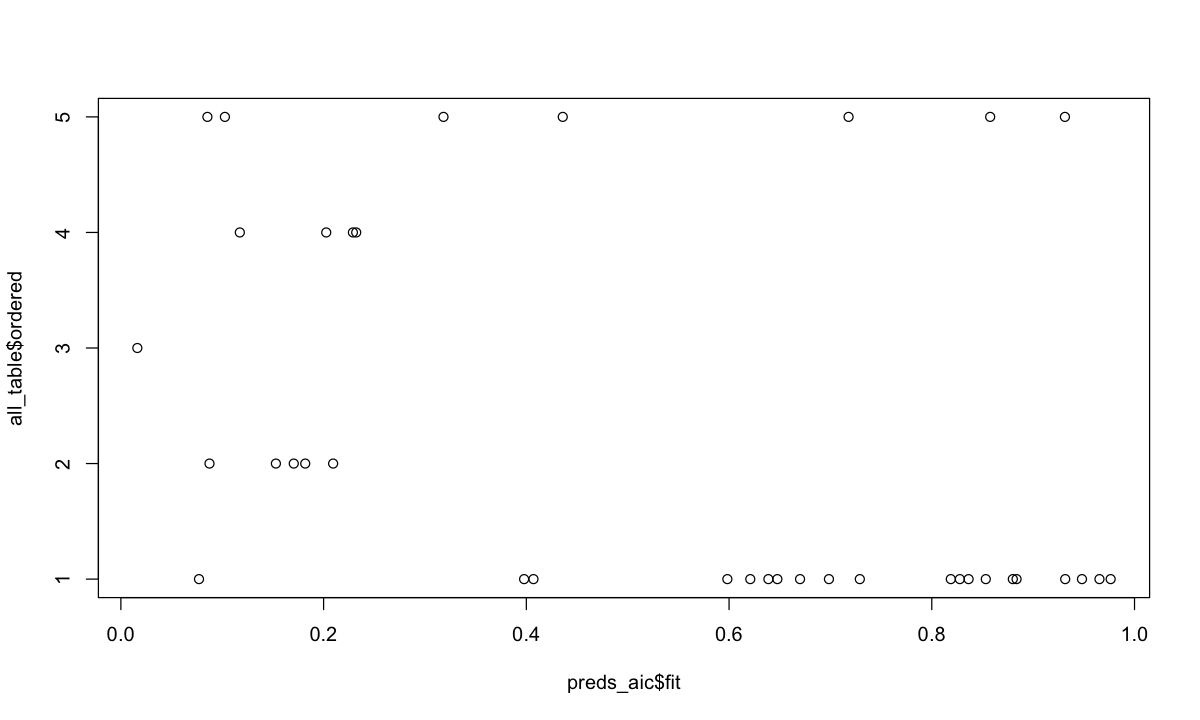

In [68]:
fit_aic <- step(fit) #stepwise regression to optimse a linear model
summary(fit_aic)
par(bg = "white")
preds_aic <-predict(fit_aic, all_table)
plot(preds_aic$fit, all_table$ordered)

### BIC

Start:  AIC=149.07
ordered ~ avg_up_ellen + avg_down_ellen + avg_rtt_ellen + avg_ellen_jitter + 
    avg_pl_ellen + avg_up_aadya + avg_down_aadya + avg_rtt_aadya + 
    avg_jitter_aadya + avg_pl_aadya + sd_up_ellen + sd_down_ellen + 
    sd_rtt_ellen + sd_jitter_ellen + sd_pl_ellen + sd_up_aadya + 
    sd_down_aadya + sd_rtt_aadya + sd_jitter_aadya + sd_pl_aadya

                   Df    AIC
- avg_pl_ellen      1 145.46
- avg_rtt_aadya     1 145.53
- sd_jitter_aadya   1 145.58
- sd_pl_ellen       1 145.62
- avg_jitter_aadya  1 145.69
- sd_rtt_aadya      1 145.76
- avg_ellen_jitter  1 145.95
- sd_jitter_ellen   1 146.02
- avg_pl_aadya      1 146.33
- sd_rtt_ellen      1 146.51
- avg_down_ellen    1 146.67
- avg_down_aadya    1 146.98
- avg_rtt_ellen     1 146.99
- sd_down_aadya     1 147.10
- sd_pl_aadya       1 147.12
- sd_up_ellen       1 147.16
- avg_up_aadya      1 147.53
- sd_down_ellen     1 147.81
- avg_up_ellen      1 148.23
<none>                149.07
- sd_up_aadya       1 149

formula: ordered ~ avg_up_aadya
data:    all_table

 link  threshold nobs logLik AIC   niter max.grad cond.H 
 logit flexible  37   -38.29 86.58 6(2)  3.23e-10 4.2e+03

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
avg_up_aadya  0.12350    0.03504   3.525 0.000424 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Threshold coefficients:
         Estimate Std. Error z value
0|0.33     1.7134     0.5781   2.964
0.33|0.5   2.5040     0.6534   3.832
0.5|0.67   2.6832     0.6730   3.987
0.67|1     3.5967     0.8080   4.451

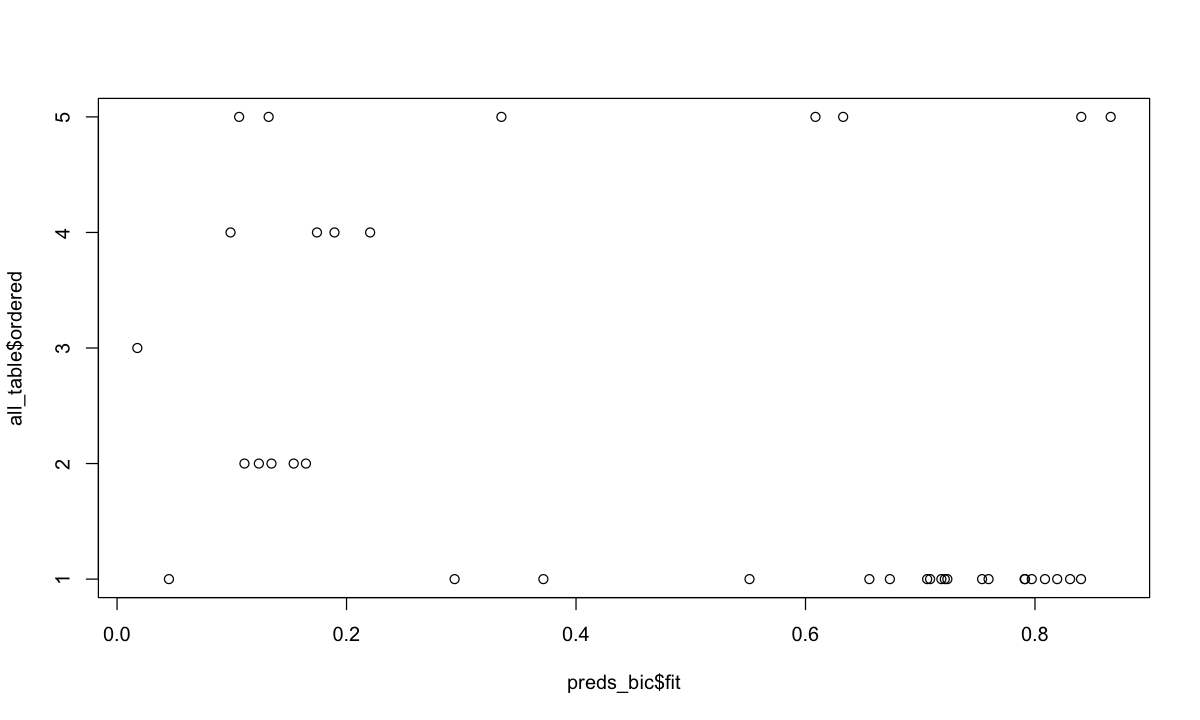

In [70]:
fit_bic <- step(fit, k = log(length(all_table$ordered)))
summary(fit_bic)
par(bg = "white")
par(bg = "white")
preds_bic <-predict(fit_bic, all_table)
plot(preds_bic$fit, all_table$ordered)